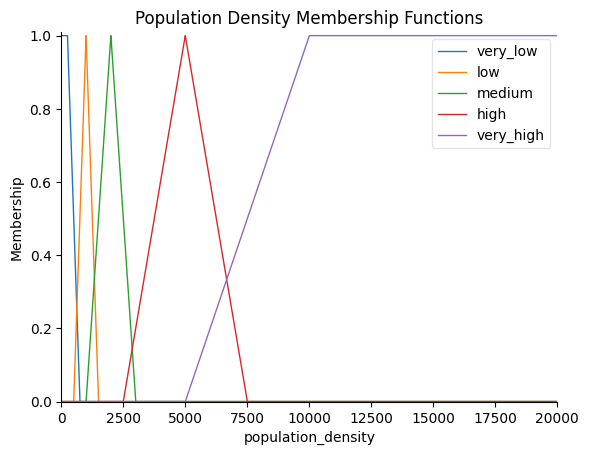

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Create universe variables
population_density = ctrl.Antecedent(np.arange(0, 20001, 1), 'population_density')
air_pollution = ctrl.Antecedent(np.arange(0, 151, 1), 'air_pollution')
veg_cover = ctrl.Antecedent(np.arange(0, 101, 1), 'veg_cover')
build_density = ctrl.Antecedent(np.arange(0, 101, 1), 'build_density')

need_for_action = ctrl.Consequent(np.arange(0, 101, 1), 'need_for_action')

# Define membership functions for population density
population_density['very_low'] = fuzz.trapmf(population_density.universe, [0, 0, 250, 750])
population_density['low'] = fuzz.trimf(population_density.universe, [500, 1000, 1500])
population_density['medium'] = fuzz.trimf(population_density.universe, [1000, 2000, 3000])
population_density['high'] = fuzz.trimf(population_density.universe, [2500, 5000, 7500])
population_density['very_high'] = fuzz.trapmf(population_density.universe, [5000, 10000, 20000, 20000])

# Population Density Membership Functions
population_density.view()
plt.title('Population Density Membership Functions')
plt.show()

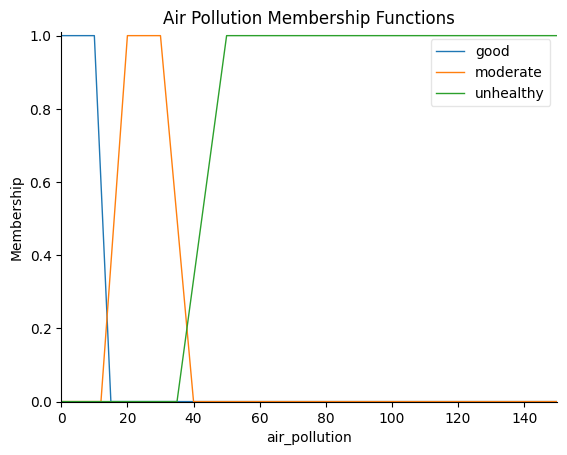

In [25]:
# Define membership functions for air pollution
air_pollution['good'] = fuzz.trapmf(air_pollution.universe, [0, 0, 10, 15])
air_pollution['moderate'] = fuzz.trapmf(air_pollution.universe, [12, 20, 30, 40])
air_pollution['unhealthy'] = fuzz.trapmf(air_pollution.universe, [35, 50, 150, 150])

# Air Pollution Membership Functions
air_pollution.view()
plt.title('Air Pollution Membership Functions')
plt.show()

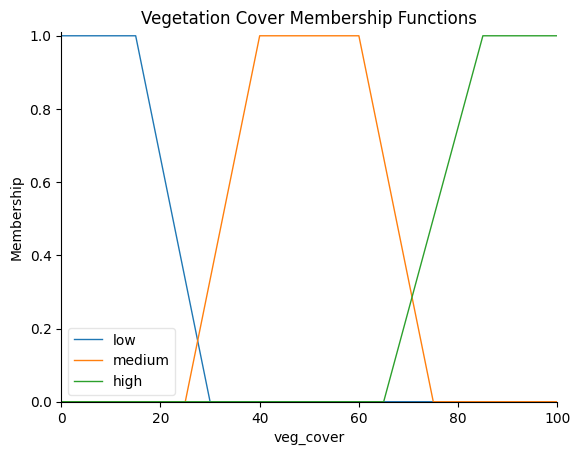

In [26]:
# Define membership functions for vegetation cover
veg_cover['low'] = fuzz.trapmf(veg_cover.universe, [0, 0, 15, 30])
veg_cover['medium'] = fuzz.trapmf(veg_cover.universe, [25, 40, 60, 75])
veg_cover['high'] = fuzz.trapmf(veg_cover.universe, [65, 85, 100, 100])

# Vegetation Cover Membership Functions
veg_cover.view()
plt.title('Vegetation Cover Membership Functions')
plt.show()

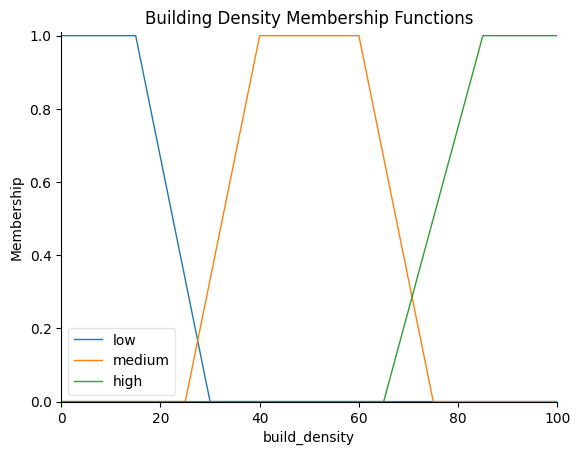

In [27]:
# Define membership functions for building density
build_density['low'] = fuzz.trapmf(build_density.universe, [0, 0, 15, 30])
build_density['medium'] = fuzz.trapmf(build_density.universe, [25, 40, 60, 75])
build_density['high'] = fuzz.trapmf(build_density.universe, [65, 85, 100, 100])

# Building Density Membership Functions
build_density.view()
plt.title('Building Density Membership Functions')
plt.show()

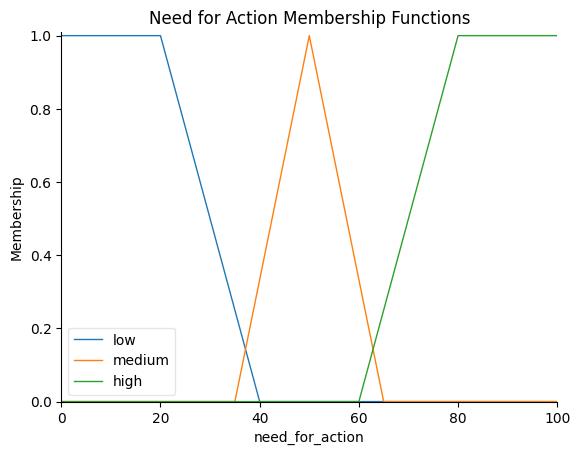

In [28]:
# Define membership functions for need for action
need_for_action['low'] = fuzz.trapmf(need_for_action.universe, [0, 0, 20, 40])
need_for_action['medium'] = fuzz.trimf(need_for_action.universe, [35, 50, 65])
need_for_action['high'] = fuzz.trapmf(need_for_action.universe, [60, 80, 100, 100])

# Need for Action Membership Functions
need_for_action.view()
plt.title('Need for Action Membership Functions')
plt.show()

In [ ]:
# Define rules
rule1 = ctrl.Rule(
    veg_cover['high'] & build_density['low'] & air_pollution['good'] & population_density['very_low'],
    need_for_action['low']
)

rule2 = ctrl.Rule(
    veg_cover['low'] & build_density['high'] & air_pollution['unhealthy'] & population_density['very_high'],
    need_for_action['high']
)

rule3 = ctrl.Rule(
    veg_cover['medium'] & build_density['medium'] & air_pollution['moderate'] & population_density['medium'],
    need_for_action['medium']
)

rule4 = ctrl.Rule(
    veg_cover['high'] & air_pollution['good'] & population_density['low'],
    need_for_action['low']
)

rule5 = ctrl.Rule(
    build_density['high'] & air_pollution['unhealthy'] & population_density['high'],
    need_for_action['high']
)

rule6 = ctrl.Rule(
    (veg_cover['low'] | build_density['high'] | air_pollution['unhealthy']) & population_density['very_high'],
    need_for_action['high']
)

rule7 = ctrl.Rule(
    veg_cover['medium'] & build_density['medium'] & population_density['medium'],
    need_for_action['medium']
)

rule8 = ctrl.Rule(
    air_pollution['moderate'] & population_density['medium'],
    need_for_action['medium']
)

rule9 = ctrl.Rule(
    air_pollution['good'] & veg_cover['high'] & population_density['low'],
    need_for_action['low']
)

rule10 = ctrl.Rule(
    build_density['low'] & air_pollution['good'] & population_density['very_low'],
    need_for_action['low']
)

rule11 = ctrl.Rule(
    veg_cover['low'] & population_density['very_high'],
    need_for_action['high']
)

rule12 = ctrl.Rule(
    air_pollution['unhealthy'] & population_density['very_high'],
    need_for_action['high']
)

rule13 = ctrl.Rule(
    veg_cover['high'] & population_density['very_high'],
    need_for_action['medium']
)

rule14 = ctrl.Rule(
    build_density['high'] & population_density['very_high'],
    need_for_action['high']
)

# Create control system
na_control_system = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,
    rule9, rule10, rule11, rule12, rule13, rule14
])
na_simulation = ctrl.ControlSystemSimulation(na_control_system)

In [ ]:
# Input values
na_simulation.input['veg_cover'] = 25       # Vegetation Cover (%)
na_simulation.input['build_density'] = 70   # Building Density (%)
na_simulation.input['air_pollution'] = 55   # µg/m³
na_simulation.input['population_density'] = 15000  # people/km² (Very High)

# Compute
na_simulation.compute()

# Output
na_score = na_simulation.output['need_for_action']
print(f"Need for Action Score: {na_score:.2f}")

In [ ]:
# Interpret need for action level
if na_score <= 40:
    na_level = "Low Need"
elif 40 < na_score <= 70:
    na_level = "Moderate Need"
else:
    na_level = "High Need"

print(f"Need for Green Infrastructure Action: {na_level}")

# Provide recommendations based on the need for action level
print("\nRecommendations:")
if na_level == "High Need":
    print("- Increase vegetation cover.")
    print("- Implement green roofs and walls.")
    print("- Use reflective surface materials.")
    print("- Reduce emissions from traffic and industry.")
elif na_level == "Moderate Need":
    print("- Enhance existing green spaces.")
    print("- Promote sustainable practices.")
    print("- Monitor air quality.")
else:
    print("- Maintain current practices.")
    print("- Engage the community in sustainability efforts.")

Need for Action Score: 84.44
Need for Green Infrastructure Action: High Need

Recommendations:
- Increase vegetation cover.
- Implement green roofs and walls.
- Use reflective surface materials.
- Reduce emissions from traffic and industry.


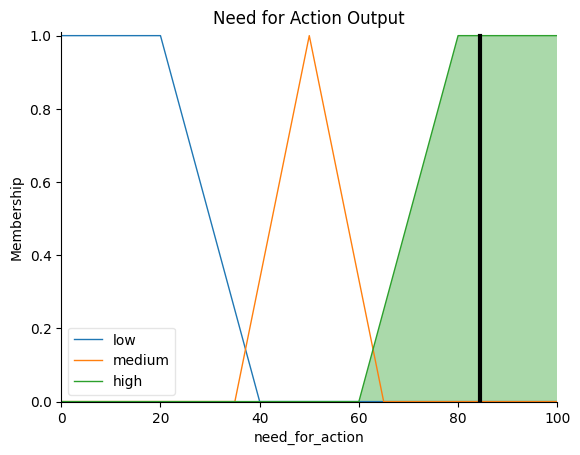

In [30]:
need_for_action.view(sim=na_simulation)
plt.title('Need for Action Output')
plt.show()

Need for Action Score: 84.44
Need for Green Infrastructure Action: High Need

Recommendations:
- Increase vegetation cover.
- Implement green roofs and walls.
- Use reflective surface materials.
- Reduce emissions from traffic and industry.


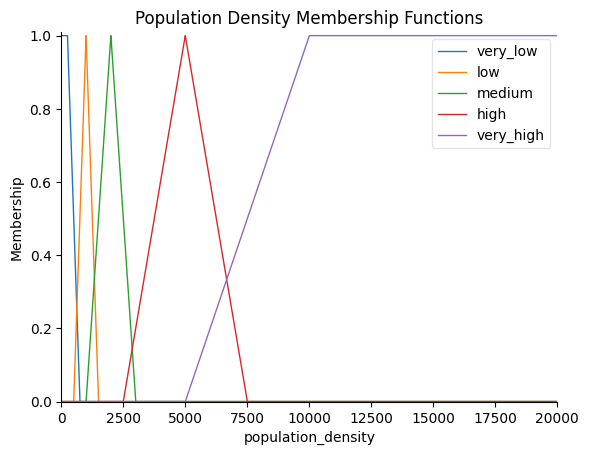

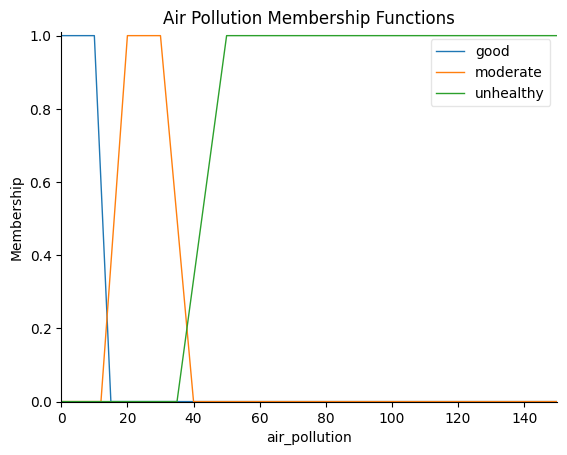

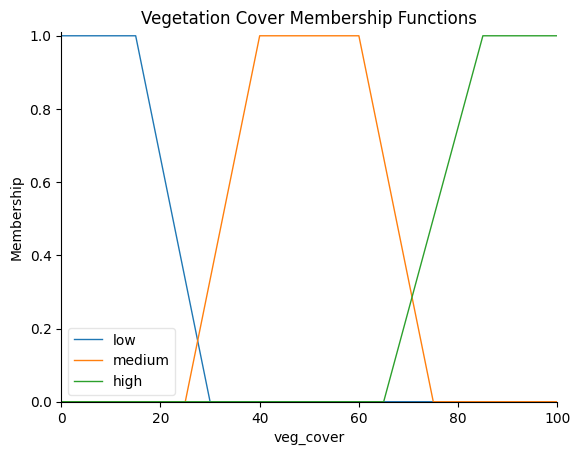

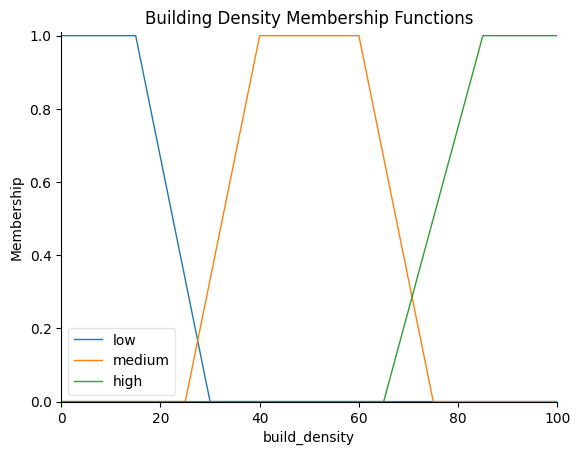

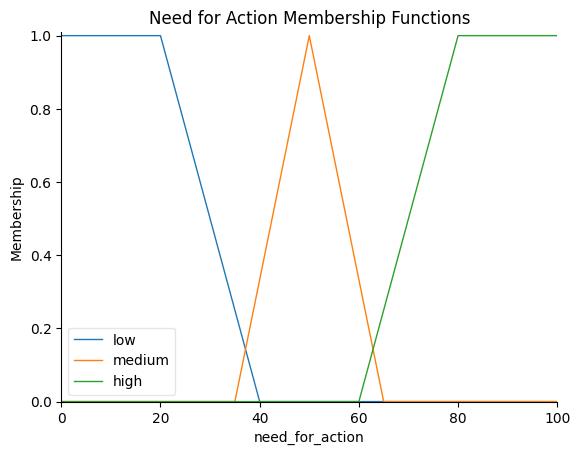

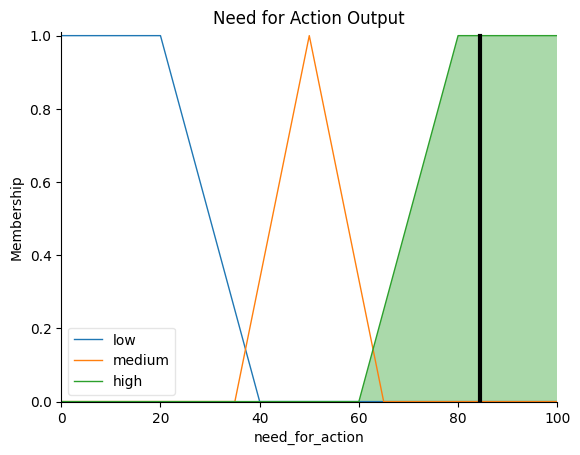